In [3]:
! pip install numpy
! pip install pandas
! pip install matplotlib

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Import Data
results_dataframe = pd.read_csv(r"C:\Users\batte\Downloads\Race\results.csv\results.csv")
circuits_dataframe = pd.read_csv(r"C:\Users\batte\Downloads\Race\circuits.csv")
drivers_dataframe = pd.read_csv(r"C:\Users\batte\Downloads\Race\drivers.csv")
races_dataframe = pd.read_csv(r"C:\Users\batte\Downloads\Race\races.csv")
constructor_dataframe = pd.read_csv(r"C:\Users\batte\Downloads\Race\constructors.csv")


In [6]:
# Prints Results Data Frame
results_dataframe.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [6]:
# Prints Drivers Data Frame
drivers_dataframe.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [7]:
# Join Data Frames
driver_result_dataframe = pd.merge(results_dataframe,drivers_dataframe,on="driverId")
race_result_dataframe = pd.merge(driver_result_dataframe,races_dataframe,on="raceId")
complete_race_data_dataframe = pd.merge(race_result_dataframe,constructor_dataframe,on="constructorId")
complete_race_data_dataframe1=complete_race_data_dataframe
complete_race_data_dataframe1.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,constructorRef,name_y,nationality_y,url
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,5,18,5,1,23,3,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,27,19,1,1,22,9,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,25,19,5,1,23,8,3,3,3,6.0,...,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,57,20,1,1,22,3,13,13,13,0.0,...,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


In [8]:
#Remove data
complete_race_data_dataframe2=complete_race_data_dataframe1.drop(columns=['url_x','url_y','name_y','url','time_y'])
complete_race_data_dataframe2.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,constructorRef,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,British
1,5,18,5,1,23,3,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,British
2,27,19,1,1,22,9,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,British
3,25,19,5,1,23,8,3,3,3,6.0,...,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,British
4,57,20,1,1,22,3,13,13,13,0.0,...,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,British


In [42]:
# Filter & Calculate Results
total_wins = complete_race_data_dataframe2[(complete_race_data_dataframe2['position']== '1')] 
total_wins['position_mod'] = total_wins['position'].astype(int)
total_wins = total_wins.groupby(['driverRef','nationality_x'])['position_mod'].sum().reset_index()
total_wins = total_wins.sort_values(by=['position_mod'], ascending=False)
total_wins = total_wins.head(10)
total_wins

C:\Users\batte\AppData\Local\Temp\ipykernel_21228\3994586824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_wins['position_mod'] = total_wins['position'].astype(int)


,driverRef,nationality_x,position_mod
38,hamilton,British,103
64,michael_schumacher,German,91
106,vettel,German,53
80,prost,French,51
96,senna,Brazilian,41
62,max_verstappen,Dutch,35
2,alonso,Spanish,32
58,mansell,British,31
98,stewart,British,27
19,clark,British,25


In [43]:
# using groupby function with aggregation
# to get mean, min and max values
result = total_wins.groupby('nationality_x').agg({'position_mod': ['min','max','mean']})

print("Min, Max, and Mean values of position grouped by nationality:\n")
print(result)


Min, Max, and Mean values of position grouped by nationality:

              position_mod           
                       min  max  mean
nationality_x                        
Brazilian               41   41  41.0
British                 25  103  46.5
Dutch                   35   35  35.0
French                  51   51  51.0
German                  53   91  72.0
Spanish                 32   32  32.0


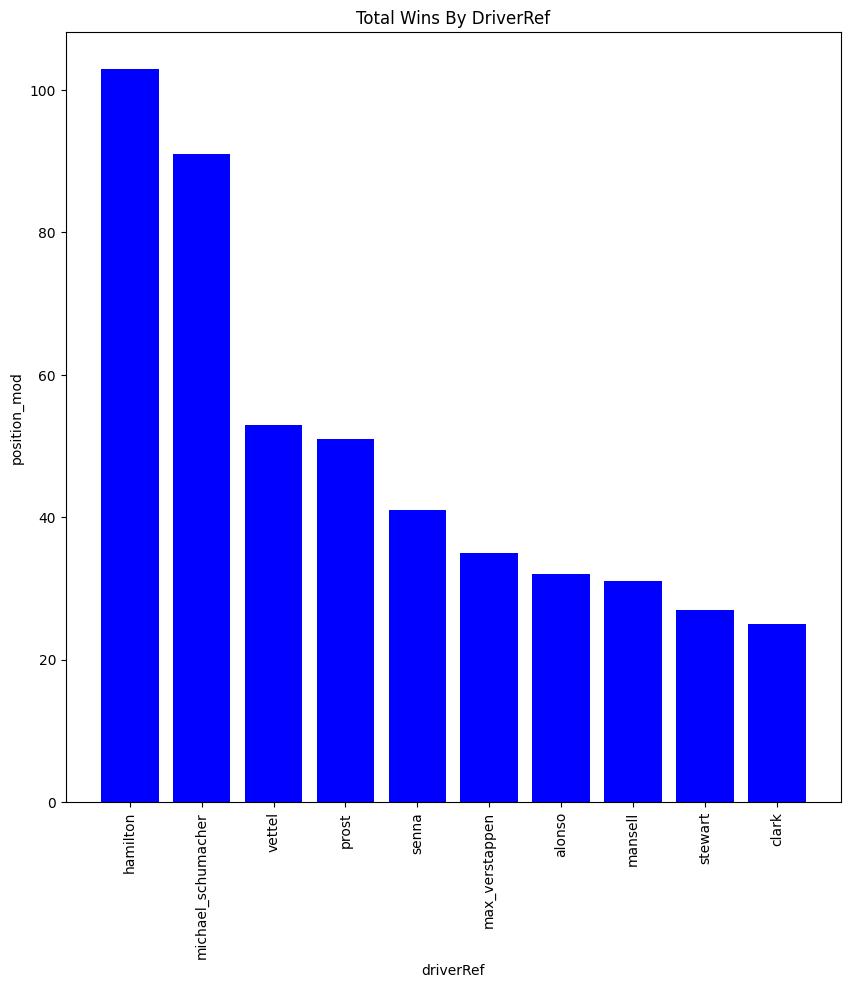

In [44]:
#Bar chart
plt.figure(figsize =(10,10))
plt.bar(total_wins["driverRef"], total_wins["position_mod"], color="blue")
plt.xlabel("driverRef")
plt.ylabel("position_mod")
plt.title("Total Wins By DriverRef")
plt.xticks(rotation = 90)
plt.show()

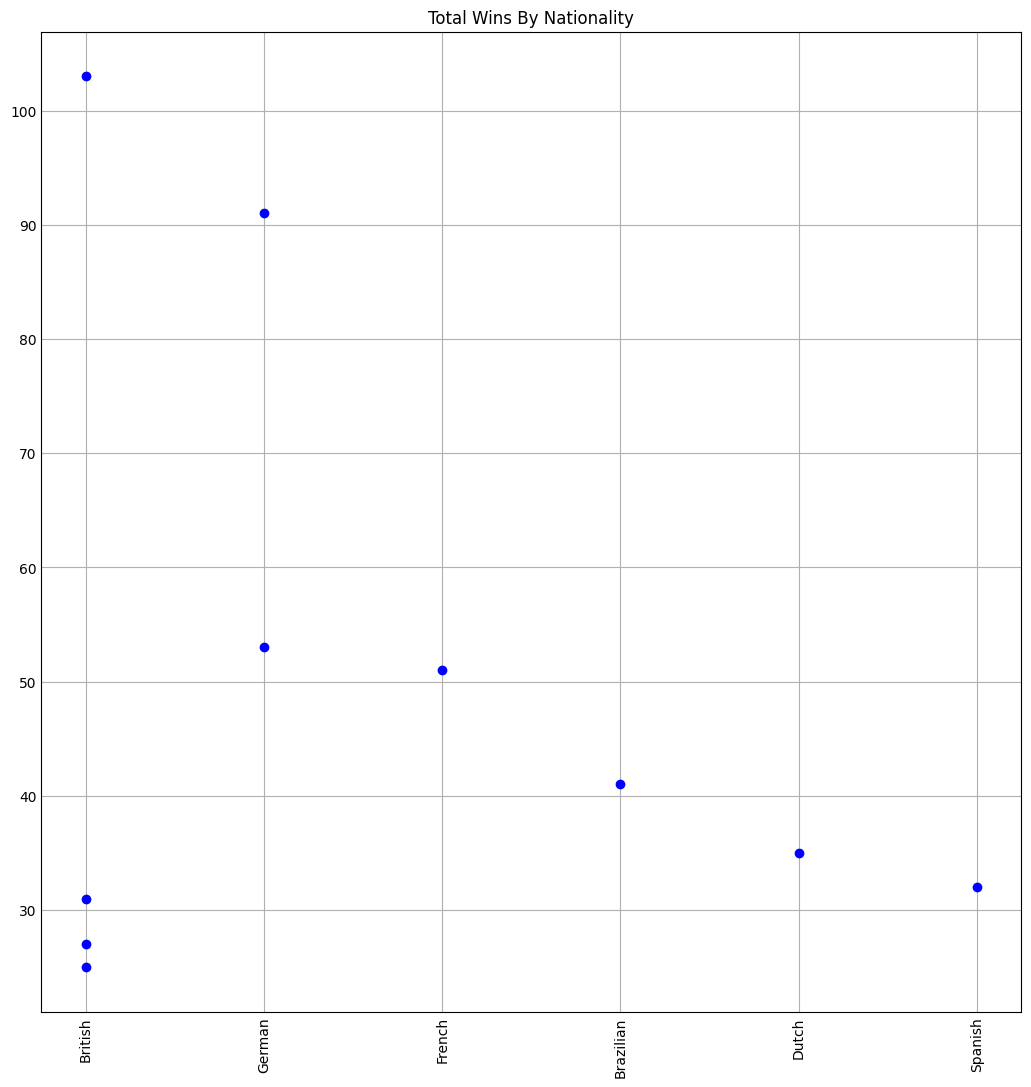

In [81]:
#Scatter Plot
plt.style.use('_mpl-gallery')

# make data
x = total_wins['nationality_x']
y = total_wins['position_mod']

plt.figure(figsize =(10,10))
plt.scatter(x,y,c="blue")
plt.xticks(rotation = 90)
plt.title("Total Wins By Nationality")
plt.show()